In [95]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots
from scipy import stats

In [96]:
plt.style.use(['science', 'notebook', 'grid'])

In [97]:
data = pd.read_excel('UELab2.xlsx', sheet_name = '2 a)')
inputVoltage = data['U1']
outputVoltage = data['U2']
frequency = data['f']
data

,U1,f,U2,Wzmocnienie,cutoff,GBW
0,0.10175,100,1.095000,10.761671,NaN,NaN
1,0.10175,200,1.095000,10.761671,NaN,NaN
2,0.10175,300,1.095000,10.761671,NaN,NaN
3,0.10175,600,1.095000,10.761671,NaN,NaN
4,0.10175,1000,1.095000,10.761671,NaN,NaN
5,0.10175,2000,1.095000,10.761671,NaN,NaN
6,0.10175,3000,1.095000,10.761671,NaN,NaN
7,0.10175,6000,1.095000,10.761671,NaN,NaN
8,0.10175,10000,1.095000,10.761671,NaN,NaN
9,0.10175,20000,1.062500,10.442260,NaN,NaN


In [98]:
amplification = 20*np.log10(outputVoltage/inputVoltage)
maxAmplification = np.max(amplification[:9])
_3dbLvl = maxAmplification - 3

In [99]:
linFit = stats.linregress(np.log10(frequency[11:]), amplification[11:])
cutoff = (_3dbLvl - linFit.intercept)/linFit.slope
print(f'Cutoff frequency: {10 ** cutoff}')
linFit

Cutoff frequency: 78644.21268382473


LinregressResult(slope=-21.0884006082052, intercept=120.87937609494088, rvalue=-0.994231700927567, pvalue=4.777520537046689e-07, stderr=0.9287356233488948, intercept_stderr=5.263703024345201)

In [100]:
linFitFlat = stats.linregress(np.log10(frequency[:10]), amplification[:10])
print(f'Slope: {linFitFlat.slope}\nIntercept: {linFitFlat.intercept}\nWzmocnienie: {10 ** (linFitFlat.intercept/20)}')

Slope: -0.058052848469076185
Intercept: 20.793788763905535
Wzmocnienie: 10.956943903684296


In [101]:
from scipy.optimize import curve_fit

In [102]:
def characteristicFun(f, fc):
    return maxAmplification - 20*np.log10((np.sqrt(1 + (f/fc)**2)))

In [103]:
popt, _ = curve_fit(characteristicFun, xdata = frequency, ydata=amplification)
popt

array([53302.38809015])

Text(0, 0.5, 'Wzmocnienie [dB]')

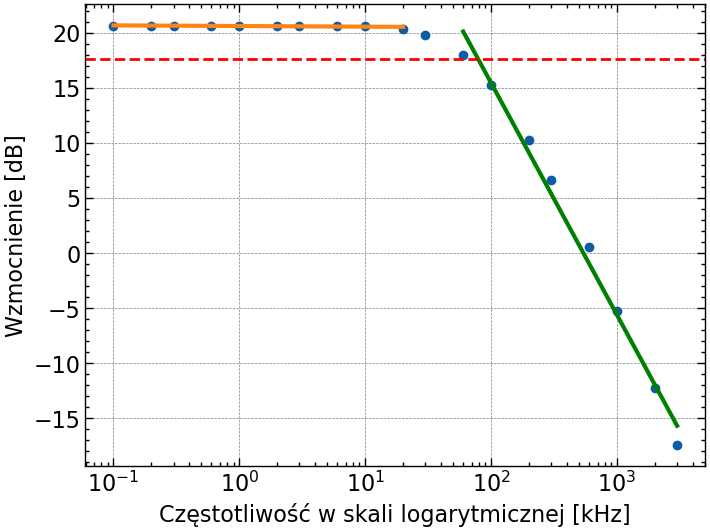

In [107]:
fig, ax = plt.subplots(1, 1)
ax.semilogx(frequency/1000, amplification, 'o', markersize = 6)
ax.semilogx(frequency[11:]/1000, np.log10(frequency[11:])*linFit.slope + linFit.intercept, color = 'green', linewidth = 3)
ax.semilogx(frequency[:10]/1000, np.log10(frequency[0:10])*linFitFlat.slope + linFitFlat.intercept, color = '#ff8413', linewidth = 3)
ax.axhline(y = _3dbLvl, linestyle = '--', color = 'red')
ax.set_xlabel('Częstotliwość w skali logarytmicznej [kHz]')
ax.set_ylabel('Wzmocnienie [dB]')

In [105]:
teoAmp = 20*np.log10(11)
teoAmp = teoAmp - 3

print(f'Cutoff katalog: {1000000/11}')


Cutoff katalog: 90909.09090909091
